In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"atharvapuranik","key":"9b7c5abf618823db5635936efd1370b6"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                  9KB  2022-10-06 08:55:25          10294        330  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset           11KB  2022-09-30 04:05:11           8219        263  1.0              
stetsondone/video-game-sales-by-genre                           Video Game Sales by Genre                        12KB  2022-10-31 17:56:01            607         23  1.0              
hasibalmuzdadid/global-air-pollution-dataset                    Global Air Pollu

# Assignment 1 : Uber Ride Price Prediction

In [ ]:
! kaggle datasets download -d yasserh/uber-fares-dataset -p /content/sample_data/

  0% 0.00/7.04M [00:00<?, ?B/s]
100% 7.04M/7.04M [00:00<00:00, 84.9MB/s]


In [ ]:
! unzip /content/sample_data/uber-fares-dataset.zip

Archive:  /content/sample_data/uber-fares-dataset.zip
  inflating: uber.csv                


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv('uber.csv', index_col=0)

In [ ]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 24238194 to 11951496
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


In [ ]:
data.dropna()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [ ]:
numeric_cols = data.select_dtypes(exclude=object).columns
data[numeric_cols].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
data = data[
    (-180 < data['pickup_longitude']) & (data['pickup_longitude'] < 180) &
    (-180 < data['dropoff_longitude']) & (data['dropoff_longitude'] < 180) &
    (-90 < data['pickup_latitude']) & (data['pickup_latitude'] < 90) &
    (-90 < data['dropoff_latitude']) & (data['dropoff_latitude'] < 90) &
    (data['passenger_count'] < 50) & (data['passenger_count'] > 0) &
    (data['fare_amount'] > 0)
]
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
#Credit to Kaggle user ADNAN BURHANPURWALA 
def haversine(lon_1, lon_2, lat_1, lat_2):
    
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

data['Distance'] = haversine(data['pickup_longitude'], data['dropoff_longitude'],
                            data['pickup_latitude'], data['dropoff_latitude'])
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


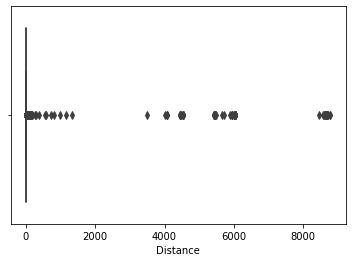

In [ ]:
sns.boxplot(data['Distance'])

In [ ]:
data = data[(data['Distance'] < 2000) & data['Distance'] > 0]

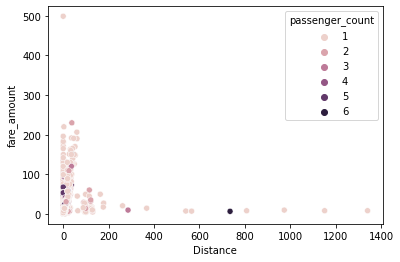

In [ ]:
sns.scatterplot(data=data, x='Distance', y='fare_amount', hue='passenger_count')

In [ ]:
# data = data[(0 < data['fare_amount'] < 200) and (200 > data['Distance'] > 0) ]
data = data[
    (data['Distance'] < 200) &
    (data['fare_amount'] < 200) & data['fare_amount']>0
]

In [ ]:
data.shape

(193217, 9)

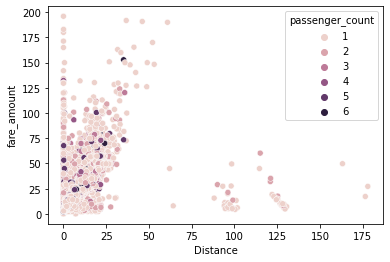

In [ ]:
sns.scatterplot(data=data, x='Distance', y='fare_amount', hue='passenger_count')

In [ ]:
data = data.drop(
    data[(data['fare_amount'] > 75) & (data['Distance'] < 5)].index)

In [ ]:
data = data.drop(
    data[(data['fare_amount'] < 75) & (data['Distance'] > 50)].index)

In [ ]:
data.shape

(193124, 9)

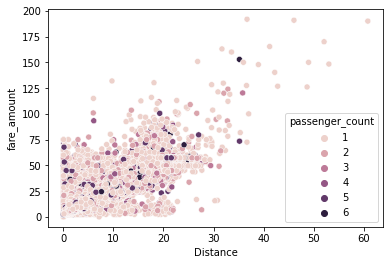

In [ ]:
sns.scatterplot(data=data, x='Distance', y='fare_amount', hue='passenger_count')

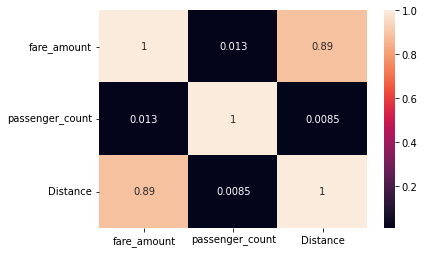

In [ ]:
corr_mat = data[['fare_amount', 'passenger_count', 'Distance']].corr()
sns.heatmap(corr_mat, annot=True)

Handling wrong datatype for Date-Time

In [ ]:
data['pickup_datetime'].dtype

dtype('O')

In [ ]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['pickup_datetime'].head()

24238194   2015-05-07 19:52:06+00:00
27835199   2009-07-17 20:04:56+00:00
44984355   2009-08-24 21:45:00+00:00
25894730   2009-06-26 08:22:21+00:00
17610152   2014-08-28 17:47:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [ ]:
data['week_day'] = data['pickup_datetime'].dt.day_name()
data['Year'] = data['pickup_datetime'].dt.year
data['Month'] = data['pickup_datetime'].dt.month
data['Hour'] = data['pickup_datetime'].dt.hour

data = data.drop(columns=['key', 'pickup_datetime'])

In [ ]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,week_day,Year,Month,Hour
24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,Thursday,2015,5,19
27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,Friday,2009,7,20
44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,Monday,2009,8,21
25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,Friday,2009,6,8
17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,Thursday,2014,8,17


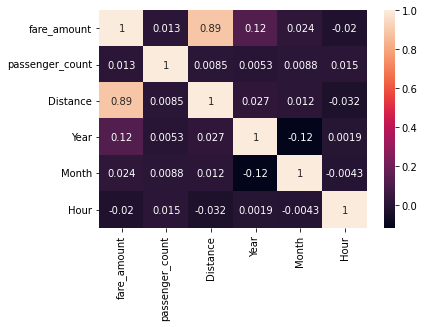

In [ ]:
corr_mat = data[['fare_amount', 'passenger_count', 'Distance', 'week_day', 'Year', 'Month', 'Hour']].corr()
sns.heatmap(corr_mat, annot=True)

In [ ]:
label_encoder = LabelEncoder()

data['week_day'] = label_encoder.fit_transform(data['week_day'])
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,week_day,Year,Month,Hour
24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,4,2015,5,19
27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,0,2009,7,20
44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,1,2009,8,21
25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,0,2009,6,8
17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,4,2014,8,17


In [ ]:
X = data.get(['Distance', 'week_day', 'Year', 'Month', 'Hour', 'passenger_count'])
Y = data['fare_amount']

In [ ]:
X.shape, Y.shape

((193124, 6), (193124,))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
regr = LinearRegression()

In [ ]:
regr.fit(X_train,y_train)

LinearRegression()

In [ ]:
regr.score(X_test, y_test)

0.7965253763639928

In [ ]:
y_pred_linreg = regr.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred_linreg)
mse = mean_squared_error(y_test, y_pred_linreg)
mae = mean_absolute_error(y_test, y_pred_linreg)
rmse = mse**(1/2)
print(f'MSE : {mse}')
print(f'RMSE : {rmse}')
print(f'MAE : {mae}')
print(f'R2 : {r2}')

MSE : 18.09576387404102
RMSE : 4.253911596876576
MAE : 2.2364333910639957
R2 : 0.7965253763639928


In [ ]:
random_forest_regressor = RandomForestRegressor()

In [ ]:
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
random_forest_regressor.score(X_test, y_test)

0.8164046576450981

In [ ]:
y_pred_rfr = random_forest_regressor.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred_rfr)
mse = mean_squared_error(y_test, y_pred_rfr)
mae = mean_absolute_error(y_test, y_pred_rfr)
rmse = mse**(1/2)
print(f'MSE : {mse}')
print(f'RMSE : {rmse}')
print(f'MAE : {mae}')
print(f'R2 : {r2}')

MSE : 16.327824591882457
RMSE : 4.040770296847182
MAE : 2.147381442071197
R2 : 0.8164046576450981


# Assignment 2 : Email Classification

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
! kaggle datasets download -d balaka18/email-spam-classification-dataset-csv -p /content/

  0% 0.00/1.66M [00:00<?, ?B/s]
100% 1.66M/1.66M [00:00<00:00, 159MB/s]


In [ ]:
! ls

email-spam-classification-dataset-csv.zip  kaggle.json	sample_data  uber.csv


In [ ]:
! unzip email-spam-classification-dataset-csv.zip

Archive:  email-spam-classification-dataset-csv.zip
  inflating: emails.csv              


In [ ]:
data = pd.read_csv('emails.csv')

In [ ]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [ ]:
X = data.iloc[:, 1:3001].values
Y = data['Prediction']

In [ ]:
X.shape, Y.shape

((5172, 3000), (5172,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

SVC()

In [ ]:
svc.score(X_test, y_test)

0.8208762886597938

In [ ]:
y_pred_svc = svc.predict(X_test)

precision = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

confusion_mat = confusion_matrix(y_test, y_pred_svc)
print(f'Precision : {precision}\nRecall : {recall}\nF1 Score : {f1}')

Precision : 0.8155339805825242
Recall : 0.4117647058823529
F1 Score : 0.5472312703583061


[[553  19]
 [120  84]]


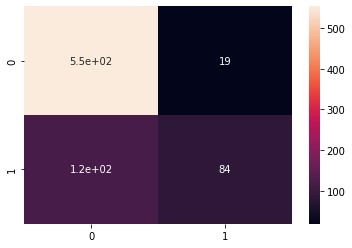

In [ ]:
sns.heatmap(confusion_mat, annot=True)
print(confusion_mat)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_classifier.score(X_test, y_test)

0.8685567010309279

In [ ]:
y_pred_knn = knn_classifier.predict(X_test)

precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

confusion_mat_knn = confusion_matrix(y_test, y_pred_knn)
print(f'Precision : {precision}\nRecall : {recall}\nF1 Score : {f1}')

Precision : 0.7007874015748031
Recall : 0.8725490196078431
F1 Score : 0.777292576419214


[[496  76]
 [ 26 178]]


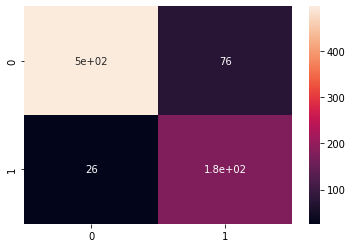

In [ ]:
sns.heatmap(confusion_mat_knn, annot=True)
print(confusion_mat_knn)

# Assignment 3 : Bank Customer Retention Probability

In [ ]:
! kaggle datasets download -d barelydedicated/bank-customer-churn-modeling -p /content/

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 83.2MB/s]


In [ ]:
! ls

bank-customer-churn-modeling.zip	   kaggle.json
emails.csv				   sample_data
email-spam-classification-dataset-csv.zip  uber.csv


In [ ]:
! unzip bank-customer-churn-modeling.zip

Archive:  bank-customer-churn-modeling.zip
  inflating: Churn_Modelling.csv     


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = data.get(['CreditScore', 'Gender', 'Geography', 'Tenure', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])
Y = data['Exited']

In [ ]:
X.shape, Y.shape

((10000, 10), (10000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
scaler = StandardScaler()
X_transform = scaler.fit_transform(X_train)
X_test_transformed = scaler.fit_transform(X_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[10]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                352       
                                                                 
 dense_25 (Dense)            (None, 64)                2112      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8,737
Trainable params: 8,737
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(x=X_transform, y=y_train, epochs=10, validation_data=(X_test_transformed, y_test), batch_size=32)

Epoch 1/10
282/282 [==============================] - 2s 3ms/step - loss: 0.4280 - accuracy: 0.8202 - val_loss: 0.4306 - val_accuracy: 0.8190
Epoch 2/10
282/282 [==============================] - 1s 2ms/step - loss: 0.3718 - accuracy: 0.8476 - val_loss: 0.3976 - val_accuracy: 0.8280
Epoch 3/10
282/282 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8566 - val_loss: 0.3900 - val_accuracy: 0.8350
Epoch 4/10
282/282 [==============================] - 1s 2ms/step - loss: 0.3466 - accuracy: 0.8586 - val_loss: 0.3921 - val_accuracy: 0.8370
Epoch 5/10
282/282 [==============================] - 1s 2ms/step - loss: 0.3402 - accuracy: 0.8604 - val_loss: 0.3989 - val_accuracy: 0.8290
Epoch 6/10
282/282 [==============================] - 1s 2ms/step - loss: 0.3367 - accuracy: 0.8620 - val_loss: 0.3952 - val_accuracy: 0.8400
Epoch 7/10
282/282 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.8652 - val_loss: 0.3913 - val_accuracy: 0.8360
Epoch 

In [ ]:
y_pred_nn = model.predict(X_test_transformed)
for i in y_pred_nn:
    if i[0]>0.5:
        i[0] = 1
    else:
        i[0] = 0
print(confusion_matrix(y_test, y_pred_nn), precision_score(y_test, y_pred_nn), recall_score(y_test, y_pred_nn), f1_score(y_test, y_pred_nn))

32/32 [==============================] - 0s 1ms/step
[[750  14]
 [152  84]] 0.8571428571428571 0.3559322033898305 0.5029940119760479


# Assignment 4 : Gradient Descent

In [ ]:
cur_x = 2
learning_rate = 0.01
precision = 0.0001
previous_step_size = 1 
max_iters = 1000
iters = 0 
df = lambda x: 2*(x+3) # (dy/dx) 

In [ ]:
while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x 
    cur_x = cur_x - learning_rate * df(prev_x)
    previous_step_size = abs(cur_x - prev_x)
    iters += 1
    print("Iteration",iters," : X value is",cur_x) #Print iterations
    
print("The local minimum occurs at", cur_x)

Iteration 1  : X value is 1.9
Iteration 2  : X value is 1.8019999999999998
Iteration 3  : X value is 1.70596
Iteration 4  : X value is 1.6118408
Iteration 5  : X value is 1.519603984
Iteration 6  : X value is 1.42921190432
Iteration 7  : X value is 1.3406276662336
Iteration 8  : X value is 1.253815112908928
Iteration 9  : X value is 1.1687388106507495
Iteration 10  : X value is 1.0853640344377344
Iteration 11  : X value is 1.0036567537489798
Iteration 12  : X value is 0.9235836186740002
Iteration 13  : X value is 0.8451119463005202
Iteration 14  : X value is 0.7682097073745098
Iteration 15  : X value is 0.6928455132270196
Iteration 16  : X value is 0.6189886029624792
Iteration 17  : X value is 0.5466088309032295
Iteration 18  : X value is 0.4756766542851649
Iteration 19  : X value is 0.40616312119946163
Iteration 20  : X value is 0.3380398587754724
Iteration 21  : X value is 0.27127906159996296
Iteration 22  : X value is 0.2058534803679637
Iteration 23  : X value is 0.14173641076060442

# Assignment 5 : K Means Clustering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
! kaggle datasets download -d kyanyoga/sample-sales-data -p /content/ --unzip

  0% 0.00/77.5k [00:00<?, ?B/s]
100% 77.5k/77.5k [00:00<00:00, 34.9MB/s]


In [ ]:
! ls

kaggle.json  sales_data_sample.csv  sample_data


In [ ]:
data = pd.read_csv('sales_data_sample.csv', encoding='Latin-1')

In [ ]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
data['CITY'] = label_encoder.fit_transform(data['CITY'])
data['STATE'] = label_encoder.fit_transform(data['STATE'])
data['COUNTRY'] = label_encoder.fit_transform(data['COUNTRY'])
data['STATUS'] = label_encoder.fit_transform(data['STATUS'])
data['DEALSIZE'] = label_encoder.fit_transform(data['DEALSIZE'])

In [ ]:
X = data.get(['CITY', 'STATE', 'COUNTRY', 'STATUS', 'DEALSIZE', 'PRICEEACH', 'QUANTITYORDERED','SALES'])

In [ ]:
wcss = []
for i in range(201,1701, 100):
    print(i)
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)

201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
[1890401.009296664, 1310527.6983294892, 1012706.6267551201, 797385.5531806457, 667290.3268994617, 556699.3743553568, 473894.44263563503, 409973.0452315976, 352891.02912940446, 303168.1485621429, 261236.60774857138, 225765.98142916668, 193722.97176547634, 164542.89024999994, 138856.40029333334]


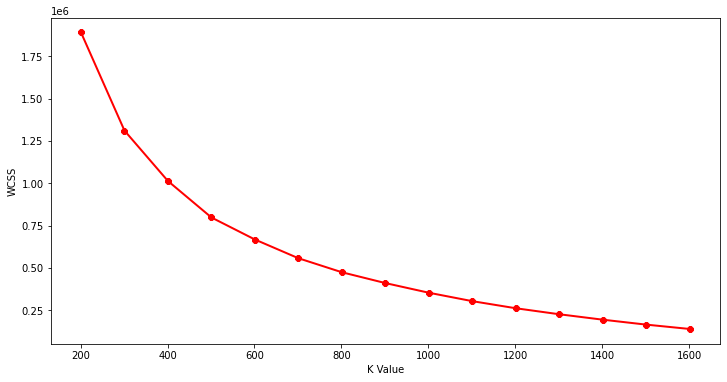

In [ ]:
plt.figure(figsize=(12,6))    
plt.plot(range(201, 1701, 100),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()